In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix
from scipy import stats

# 1. Load datasets

In [3]:
hs = pd.read_csv("C:\\Users\\gpava\\OneDrive\\Desktop\\house_sales.csv")
kc = pd.read_csv("C:\\Users\\gpava\\OneDrive\\Desktop\\kc_tax.csv\\kc_tax.csv")
# Clean column names
hs.columns = [c.lower() for c in hs.columns]
kc.columns = [c.lower() for c in kc.columns]

In [5]:
# Identify useful columns
price_col = "house_sale_price"
sqft_col = "sq_ft_tot_living"
# Keep subset
df = hs[[price_col, sqft_col, 'bathroom_count', 'bedroom_count', 'bldg_grade']].dropna()
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df[sqft_col] = pd.to_numeric(df[sqft_col], errors='coerce')

# ------------------
# 2. Percentiles & IQR
# ------------------

Price percentiles: [ 179985.76  360563.    471315.    649443.   2049693.2 ]
IQR: 288880.0


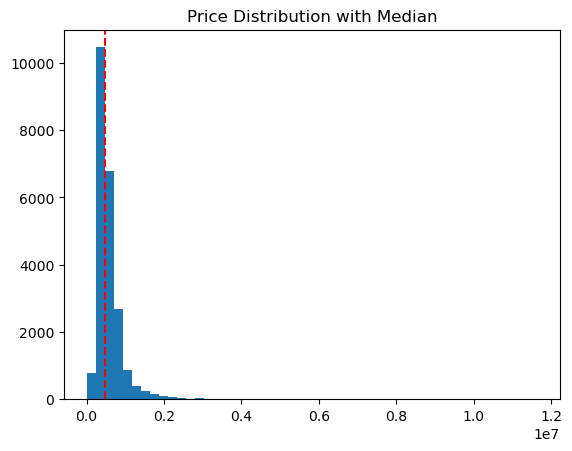

In [7]:
price = df[price_col]
percentiles = np.percentile(price, [1, 25, 50, 75, 99])
iqr = np.percentile(price, 75) - np.percentile(price, 25)
print("Price percentiles:", percentiles)
print("IQR:", iqr)


plt.hist(price, bins=50)
plt.axvline(np.median(price), color='red', linestyle='--')
plt.title("Price Distribution with Median")
plt.show()

# ------------------
# 3. Visualizing categorical data
# ------------------

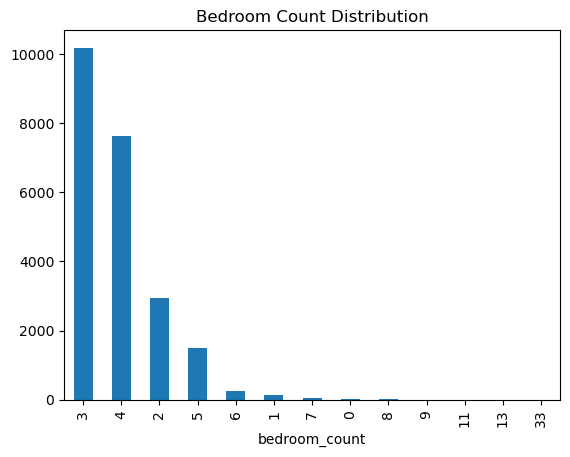

C:\Users\gpava\AppData\Local\Temp\ipykernel_15656\2132034721.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['bedroom_count']==3][price_col], df[df['bedroom_count']==4][price_col]], labels=['3-bed','4-bed'])


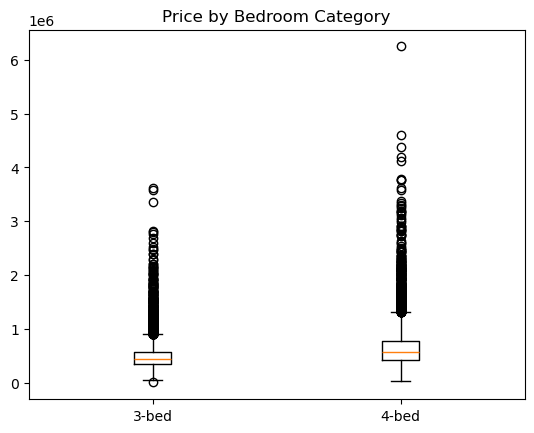

In [9]:
cat_counts = df['bedroom_count'].value_counts()
cat_counts.plot(kind='bar')
plt.title("Bedroom Count Distribution")
plt.show()


plt.boxplot([df[df['bedroom_count']==3][price_col], df[df['bedroom_count']==4][price_col]], labels=['3-bed','4-bed'])
plt.title("Price by Bedroom Category")
plt.show()

# ------------------
# 4. Correlation & pair plots
# ------------------

Correlation Matrix:
                   house_sale_price  sq_ft_tot_living  bathroom_count  \
house_sale_price          1.000000          0.695183        0.529189   
sq_ft_tot_living          0.695183          1.000000        0.764186   
bathroom_count            0.529189          0.764186        1.000000   
bedroom_count             0.312020          0.600288        0.537953   

                  bedroom_count  
house_sale_price       0.312020  
sq_ft_tot_living       0.600288  
bathroom_count         0.537953  
bedroom_count          1.000000  


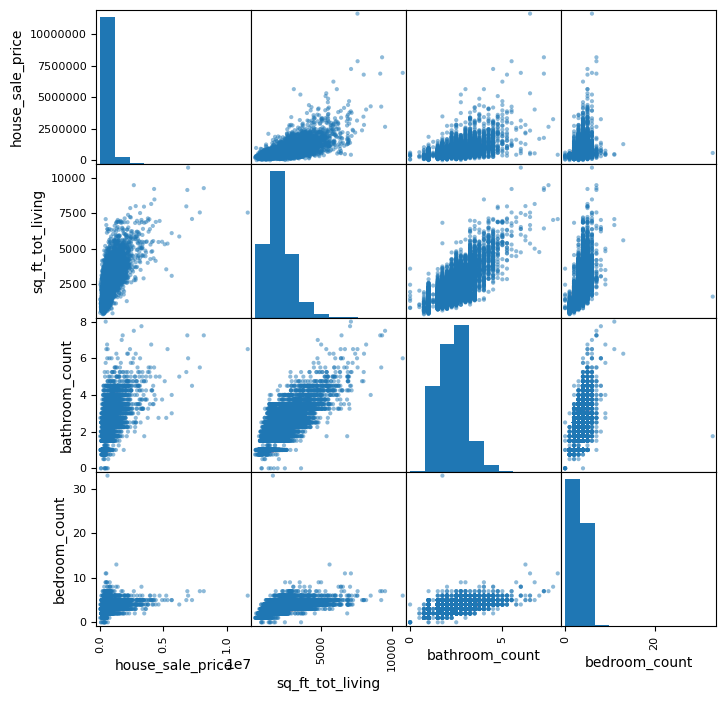

In [11]:
corr = df[[price_col, sqft_col, 'bathroom_count','bedroom_count']].corr()
print("Correlation Matrix:\n", corr)


pd.plotting.scatter_matrix(df[[price_col, sqft_col, 'bathroom_count','bedroom_count']], figsize=(8,8))
plt.show()

# ------------------
# 5. Central Limit Theorem demo
# ------------------

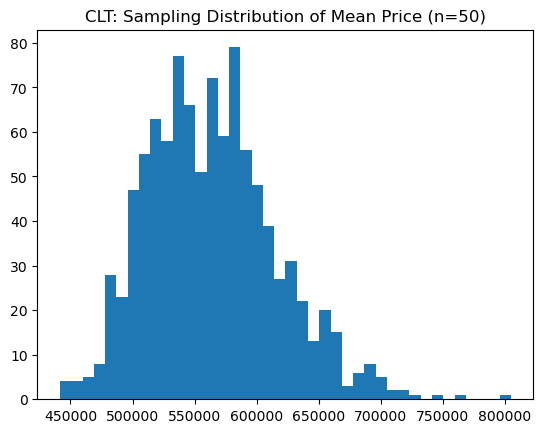

In [15]:
sample_means = []
for i in range(1000):
    sample = price.sample(50, replace=True)
    sample_means.append(sample.mean())
plt.hist(sample_means, bins=40)
plt.title("CLT: Sampling Distribution of Mean Price (n=50)")
plt.show()

# ------------------
# 6. Hypothesis testing (t-distribution)
# ------------------
# Test if mean price differs from 500,000

T-test vs 500k: t= 25.50174410287702 p= 1.8520374878668074e-141


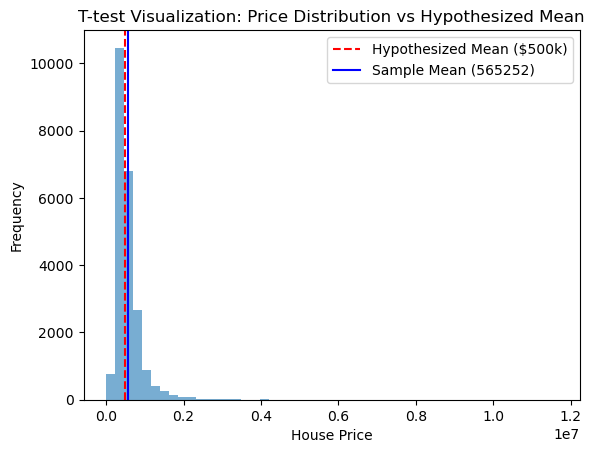

In [33]:
mu0 = 500000
t_stat, p_val = stats.ttest_1samp(price, mu0)
print("T-test vs 500k: t=", t_stat, "p=", p_val)
plt.hist(price, bins=50, alpha=0.6)
plt.axvline(mu0, color='red', linestyle='--', label='Hypothesized Mean ($500k)')
plt.axvline(price.mean(), color='blue', linestyle='-', label=f"Sample Mean ({price.mean():.0f})")
plt.title("T-test Visualization: Price Distribution vs Hypothesized Mean")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# ------------------
# 7. A/B Testing (simulate high vs low grade)
# ------------------

Mean price high grade: 993006.2308026031
Mean price low grade: 456178.4912329222


C:\Users\gpava\AppData\Local\Temp\ipykernel_15656\776384030.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([low_grade, high_grade], labels=['Low Grade','High Grade'])


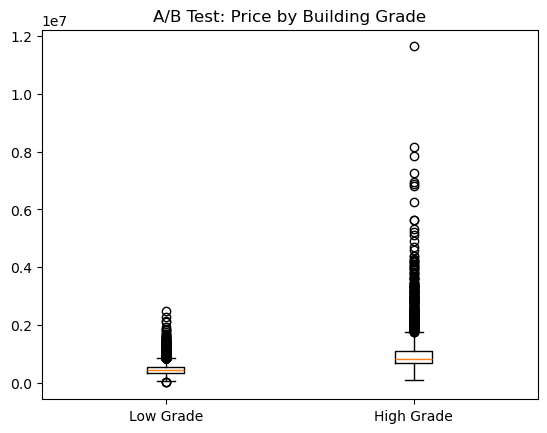

In [35]:
high_grade = df[df['bldg_grade']>=9][price_col]
low_grade = df[df['bldg_grade']<9][price_col]
print("Mean price high grade:", high_grade.mean())
print("Mean price low grade:", low_grade.mean())
plt.boxplot([low_grade, high_grade], labels=['Low Grade','High Grade'])
plt.title("A/B Test: Price by Building Grade")
plt.show()

# ------------------
# 8. Two-sample t-test (3 vs 4 bedrooms)
# ------------------

Two-sample t-test (3 vs 4 beds): t= -34.75052600943355 p= 3.9028693329011323e-252


C:\Users\gpava\AppData\Local\Temp\ipykernel_15656\247088519.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([prices_3, prices_4], labels=['3-bed','4-bed'])


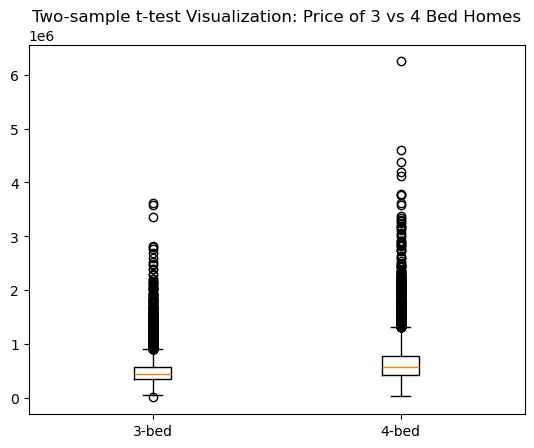

In [37]:
prices_3 = df[df['bedroom_count']==3][price_col]
prices_4 = df[df['bedroom_count']==4][price_col]
t_stat2, p_val2 = stats.ttest_ind(prices_3, prices_4, equal_var=False)
print("Two-sample t-test (3 vs 4 beds): t=", t_stat2, "p=", p_val2)
plt.boxplot([prices_3, prices_4], labels=['3-bed','4-bed'])
plt.title("Two-sample t-test Visualization: Price of 3 vs 4 Bed Homes")
plt.show()

# ------------------
# 9. Linear regression
# ------------------

                            OLS Regression Results                            
Dep. Variable:       house_sale_price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7589.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:51:54   Log-Likelihood:            -3.1614e+05
No. Observations:               22689   AIC:                         6.323e+05
Df Residuals:                   22685   BIC:                         6.323e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.648e+04   7333.072  

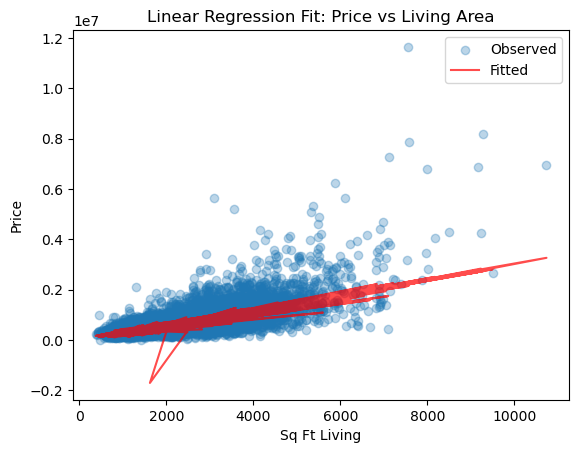

In [39]:
X = df[[sqft_col, 'bathroom_count','bedroom_count']]
X = sm.add_constant(X)
y = df[price_col]
model_lin = sm.OLS(y, X).fit()
print(model_lin.summary())
plt.scatter(df[sqft_col], y, alpha=0.3, label='Observed')
plt.plot(df[sqft_col], model_lin.predict(X), color='red', alpha=0.7, label='Fitted')
plt.xlabel("Sq Ft Living")
plt.ylabel("Price")
plt.title("Linear Regression Fit: Price vs Living Area")
plt.legend()
plt.show()

# ------------------
# 10. Spline regression (nonlinear sqft effect)
# ------------------

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4114.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:52:18   Log-Likelihood:                -7268.5
No. Observations:               22689   AIC:                         1.455e+04
Df Residuals:                   22682   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

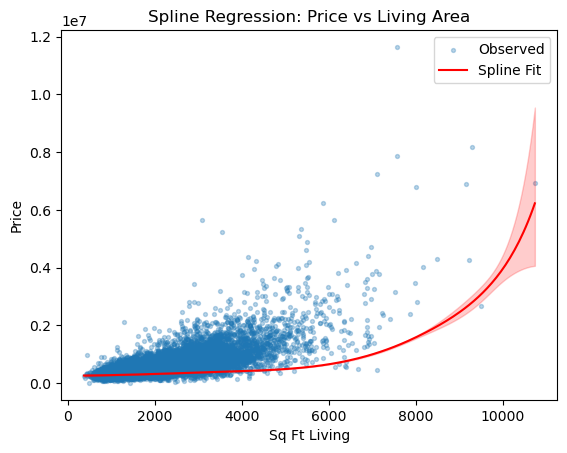

In [41]:
df_model = df[[price_col, sqft_col]].dropna().copy()
df_model = df_model[(df_model[price_col]>0)&(df_model[sqft_col]>0)]
df_model['log_price'] = np.log(df_model[price_col])


trans_x = dmatrix("bs(x, df=6, degree=3, include_intercept=False)", {"x": df_model[sqft_col]}, return_type='dataframe')
model_spline = sm.OLS(df_model['log_price'], sm.add_constant(trans_x)).fit()
print(model_spline.summary())
x_grid = np.linspace(df_model[sqft_col].min(), df_model[sqft_col].max(), 200)
X_grid = dmatrix("bs(x, df=6, degree=3, include_intercept=False)", {"x": x_grid}, return_type='dataframe')
preds = model_spline.get_prediction(sm.add_constant(X_grid)).summary_frame(alpha=0.05)
plt.scatter(df_model[sqft_col], df_model[price_col], alpha=0.3, s=8, label='Observed')
plt.plot(x_grid, np.exp(preds['mean']), color='red', label='Spline Fit')
plt.fill_between(x_grid, np.exp(preds['mean_ci_lower']), np.exp(preds['mean_ci_upper']), color='red', alpha=0.2)
plt.xlabel("Sq Ft Living")
plt.ylabel("Price")
plt.title("Spline Regression: Price vs Living Area")
plt.legend()
plt.show()

# ------------------
# 11. Poisson regression (zipcode-level counts)
# ------------------

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  116
Model:                            GLM   Df Residuals:                      114
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6879e+05
Date:                Mon, 22 Sep 2025   Deviance:                   5.3671e+05
Time:                        20:52:38   Pearson chi2:                 7.36e+09
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.3493      0.002   5106.456      

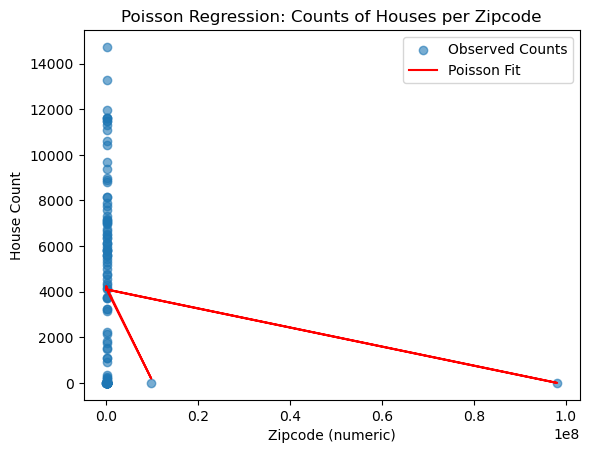

In [43]:
counts = kc['zipcode'].value_counts().reset_index()
counts.columns = ['zipcode','count']
counts['zip_numeric'] = pd.to_numeric(counts['zipcode'], errors='coerce')


X_poi = sm.add_constant(counts['zip_numeric'])
y_poi = counts['count']
model_poi = sm.GLM(y_poi, X_poi, family=sm.families.Poisson()).fit()
print(model_poi.summary())
plt.scatter(counts['zip_numeric'], counts['count'], alpha=0.6, label='Observed Counts')
plt.plot(counts['zip_numeric'], model_poi.predict(X_poi), color='red', label='Poisson Fit')
plt.xlabel("Zipcode (numeric)")
plt.ylabel("House Count")
plt.title("Poisson Regression: Counts of Houses per Zipcode")
plt.legend()
plt.show()

# ------------------
# 12. One-tailed t-test
# ------------------
# Example: test if 4-bed homes > 3-bed homes in mean price

One-tailed t-test (4-bed > 3-bed): t= 34.75052600943355 p= 1.9514346664505662e-252


C:\Users\gpava\AppData\Local\Temp\ipykernel_15656\2251160553.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([prices_3, prices_4], labels=['3-bed','4-bed'])


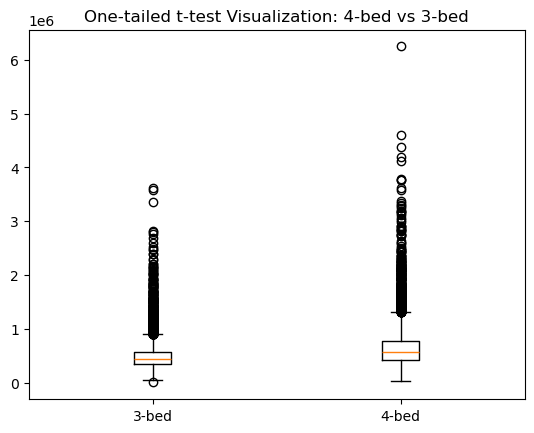

In [45]:
stat, p = stats.ttest_ind(prices_4, prices_3, equal_var=False)
# One-tailed p-value (divide by 2 if direction holds)
if stat > 0:
    p_one = p/2
else:
    p_one = 1 - p/2
print("One-tailed t-test (4-bed > 3-bed): t=", stat, "p=", p_one)
plt.boxplot([prices_3, prices_4], labels=['3-bed','4-bed'])
plt.title("One-tailed t-test Visualization: 4-bed vs 3-bed")
plt.show()